<a href="https://colab.research.google.com/github/gascondev/Reinforcement_Learning/blob/main/Reinforcement_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Camino tomado por el agente: [(0, 0), (0, 1), (0, 2), (0, 3), (1, 3), (2, 3), (2, 2), (2, 1), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0)]


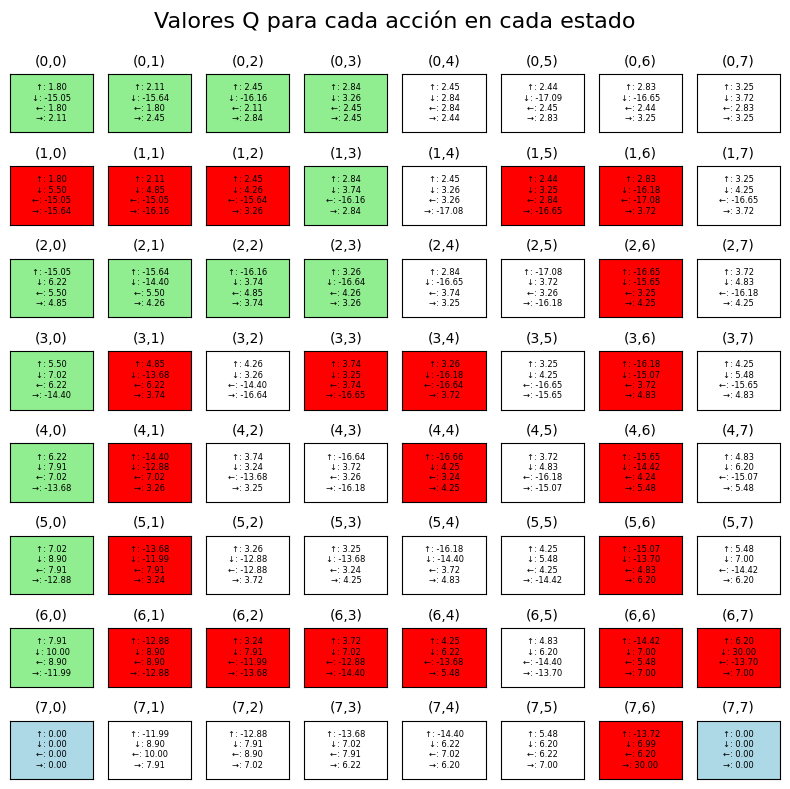

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Parámetros
alpha = 0.1  # Tasa de aprendizaje
gamma = 0.9  # Factor de descuento
epsilon = 0.9  # Probabilidad de exploración
num_episodios = 1000  # Número de episodios

# Definición del entorno
size = 8
penalization = [(1, 0),(1, 1),(1, 2),(1, 5),(1, 6),(2,6),(3, 1),(3, 3),(3, 4),(3, 6),(4, 1),(4, 4),(4, 6), (5, 1),(5, 6),(6, 1),(6, 2),(6, 3),(6, 4),(6,6),(6,7),(7,6)]
goals = [(7, 0), (7, 7)]  # Lista de objetivos

# Inicializar Q-table
Q = np.zeros((size, size, 4))  # 4 acciones: 0: Arriba, 1: Abajo, 2: Izquierda, 3: Derecha

# Función para obtener la próxima posición
def move(state, action):
    x, y = state
    if action == 0 and x > 0:  # Arriba
        return (x - 1, y)
    elif action == 1 and x < size - 1:  # Abajo
        return (x + 1, y)
    elif action == 2 and y > 0:  # Izquierda
        return (x, y - 1)
    elif action == 3 and y < size - 1:  # Derecha
        return (x, y + 1)
    return state  # Si se intenta moverse fuera del borde

# Entrenamiento del agente
for episodio in range(num_episodios):
    state = (0, 0)  # Comienza en (0,0)

    while state not in goals:
        # Seleccionar acción (exploración vs. explotación)
        if random.uniform(0, 1) < epsilon:
            action = random.randint(0, 3)  # Exploración
        else:
            action = np.argmax(Q[state[0], state[1]])  # Explotación

        # Realizar movimiento
        next_state = move(state, action)

        # Calcular recompensa
        if next_state in goals:
          if next_state == (7, 0):
            reward = 10
          else:
            reward = 30  # Recompensa por alcanzar cualquier objetivo
        elif next_state in penalization:
            reward = -20
        else:
            reward = -0.1  # Penalización por movimiento

        # Actualizar Q-value
        Q[state[0], state[1], action] += alpha * (reward + gamma * np.max(Q[next_state[0], next_state[1]]) - Q[state[0], state[1], action])

        state = next_state  # Mover al nuevo estado

# Visualización de la Q-table
def plot_q_table(Q, path):
    fig, axs = plt.subplots(size, size, figsize=(8, 8))
    actions = ['↑', '↓', '←', '→']

    for i in range(size):
        for j in range(size):
            cell_values = [f"{actions[a]}: {Q[i, j, a]:.2f}" for a in range(4)]
            axs[i, j].text(3.5, 3.5, "\n".join(cell_values), fontsize=6, ha='center', va='center')
            axs[i, j].set_xticks([])
            axs[i, j].set_yticks([])
            axs[i, j].set_xlim(-0.5, size-0.5)
            axs[i, j].set_ylim(size-0.5, -0.5)
            axs[i, j].set_title(f"({i},{j})", fontsize=10)

            if (i, j) in path:
              axs[i, j].set_facecolor('lightgreen')
            if (i, j) in penalization:
              axs[i, j].set_facecolor('red')
            if (i, j) in goals:
              axs[i, j].set_facecolor('lightblue')

    plt.suptitle("Valores Q para cada acción en cada estado", fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.9)
    plt.show()

# Probar el agente después del entrenamiento
state = (0, 0)
path = [state]
while state not in goals:
    action = np.argmax(Q[state[0], state[1]])
    state = move(state, action)
    path.append(state)

print("Camino tomado por el agente:", path)
plot_q_table(Q, path)